# Python for Creating CSV and Preliminary Reporting

In [13]:
import csv
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

%matplotlib inline
plt.style.use('ggplot')

## Load Data and Write to CSV


In [2]:
with open("roman-amphitheaters.geojson") as f:
    j = json.load(f)

In [3]:
# If there is one, I'd welcome a more pythonic approach. One that 
# accomodates the variable data model supported by JSON.

d = []
for feature in j['features']:
    
    # Check for optional properties

    if 'latintoponym' in feature['properties'].keys():
        latintoponym = feature['properties']['latintoponym']
    else:
        latintoponym = ''    

    if 'welchid' in feature['properties'].keys():
        welchid = feature['properties']['welchid']
    else:
        welchid = ''

    if 'golvinid' in feature['properties'].keys():
        golvinid = feature['properties']['golvinid']
    else:
        golvinid = ''

    if 'buildingtype' in feature['properties'].keys():
        buildingtype = feature['properties']['buildingtype']
    else:
        buildingtype = ''
        
    if 'buildingtype' in feature['properties'].keys():
        buildingtype = feature['properties']['buildingtype']
    else:
        buildingtype = ''
 
    if 'chronogroup' in feature['properties'].keys():
        chronogroup = feature['properties']['chronogroup']
    else:
        chronogroup = ''

    secondcentury = True
    if 'exclude' in feature['properties'].keys():
        secondcentury = False

    if 'capacity' in feature['properties'].keys():
        capacity = feature['properties']['capacity']['quantity']
    else:
        capacity = ''

    if 'province' in feature['properties'].keys():
        romanregion = feature['properties']['province']
    elif 'region' in feature['properties'].keys():
        romanregion = feature['properties']['region']
    else:
        romanregion = ''
        
    arenamajor = ''
    arenaminor = ''
    extmajor = ''
    extminor = ''
    exteriorheight = ''
    if 'dimensions' in feature['properties'].keys():
        dimensions = feature['properties']['dimensions']
        
        if 'arenamajor' in dimensions.keys():
            arenamajor = dimensions['arenamajor']

        if 'arenaminor' in dimensions.keys():
            arenaminor = dimensions['arenaminor']
            
        if 'exteriormajor' in dimensions.keys():
            extmajor = dimensions['exteriormajor']

        if 'exteriorminor' in dimensions.keys():
            extminor = dimensions['exteriorminor']
            
        if 'exteriorheight' in dimensions.keys():
            exteriorheight = dimensions['exteriorheight']
            
    d.append((feature['id'],
              feature['properties']['title'],
              feature['properties']['label'],
              latintoponym,
              feature['properties']['pleiades'],
              welchid,
              golvinid,
              buildingtype,
              chronogroup,
              secondcentury,
              capacity,
              feature['properties']['moderncountry'],
              romanregion,
              arenamajor,
              arenaminor,
              extmajor,
              extminor,
              exteriorheight,
              feature['geometry']['coordinates'][0],
              feature['geometry']['coordinates'][1],
              feature['geometry']['coordinates'][2]))

ramphs_df = pd.DataFrame(d, columns=(
 'id',    # short id
 'title', # longer title
 'label', # short label
 'latintoponym', # latin toponym
 'pleiades', # pleiades https uri
 'welchid',  # id in Welch
 'golvinid', # id in Golvin
 'buildingtype',  # usually 'amphitheater'
 'chronogroup',   # label for the chronological group
 'secondcentury', # is this an amphitheater that was in use in 2nd century
 'capacity',    # capacity as integer
 'modcountry',  # modern country
 'romanregion', # province or augustan region of italy
 'arenamajor', # long axis of arena in meters
 'arenaminor', # short axis of arena in meters
 'extmajor',   # long axis of exterior
 'extminor', # short axis of exterior
 'exteriorheight',   # height of exterior wall if known
 'longitude', # latitude
 'latitude', # longitude
 'elevation'  # elevation in meters.
 )) 

ramphs_df[['capacity','elevation','arenamajor','arenaminor',
        'extmajor','extminor','exteriorheight']] = ramphs_df[['capacity','elevation','arenamajor',
        'arenaminor','extmajor','extminor','exteriorheight']].apply(pd.to_numeric)

In [4]:
ramphs_df.to_csv("roman-amphitheaters.csv", index = False, quoting = csv.QUOTE_NONNUMERIC)

In [5]:
ramphs_df[['id','title','chronogroup','latintoponym','romanregion','modcountry','capacity',
           'extmajor','extminor','arenamajor','arenaminor','latitude','longitude']].to_csv('tmp.csv', index = False, quoting = csv.QUOTE_NONNUMERIC)

## Basic Reporting

In [6]:
ramphs_df.head(2)

,id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,...,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
0,duraEuroposAmphitheater,Amphitheater at Dura Europos,Dura,Dura Europus,https://pleiades.stoa.org/places/893989,,129,amphitheater,severan,False,...,Syria,syria,31.0,25.0,50.0,44.0,NaN,40.728926,34.749855,223
1,arlesAmphitheater,Amphitheater at Arles,Arles,Arelate,https://pleiades.stoa.org/places/148217,,154,amphitheater,flavian,True,...,France,narbonensis,47.0,32.0,136.0,107.0,NaN,4.631111,43.677778,21


In [7]:
ramphs_df.describe()

,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
count,124.000000,150.000000,149.000000,181.000000,167.000000,3.000000,261.000000,261.000000,261.000000
mean,12095.806452,57.176667,38.089933,97.437182,77.107844,41.483333,10.607393,42.206039,192.628352
std,9200.198900,14.263028,8.499440,29.751924,24.859736,9.859048,9.039066,4.966858,210.522363
min,1000.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,-121.000000
25%,5112.500000,47.125000,33.000000,76.000000,59.200000,36.225000,5.490960,37.983696,32.000000
50%,9200.000000,58.000000,39.000000,95.000000,75.000000,40.000000,10.913907,42.077200,119.000000
75%,15662.500000,67.000000,43.000000,117.720000,94.250000,46.000000,14.250089,45.467767,283.000000
max,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,40.728926,55.602600,1170.000000


In [8]:
ramphs_df[ramphs_df.secondcentury].describe()

,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
count,115.000000,141.000000,140.000000,172.000000,160.000000,2.000000,243.000000,243.000000,243.000000
mean,11859.826087,57.281915,38.249286,96.765291,76.610688,42.225000,10.119319,42.329709,195.041152
std,9071.861611,14.358440,8.561603,28.713826,24.773195,13.823938,8.855243,5.005590,211.581565
min,1200.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,1.000000
25%,5075.000000,47.000000,33.000000,75.750000,58.950000,37.337500,4.164815,38.314765,34.000000
50%,9000.000000,58.000000,39.000000,93.400000,74.000000,42.225000,10.583180,42.239312,120.000000
75%,15095.000000,67.000000,43.000000,115.000000,93.400000,47.112500,14.095206,45.644955,283.000000
max,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,38.273763,55.602600,1170.000000


In [9]:
# Confirm that CSV is readable
# It would be nice if the "numeric pattern" string survived as strings.
pd.read_csv("roman-amphitheaters.csv", quoting = 2).describe()

,welchid,golvinid,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
count,18.000000,82.000000,124.000000,150.000000,149.000000,181.000000,167.000000,3.000000,261.000000,261.000000,261.000000
mean,9.777778,109.524390,12095.806452,57.176667,38.089933,97.437182,77.107844,41.483333,10.607393,42.206039,192.628352
std,5.704029,63.329089,9200.198900,14.263028,8.499440,29.751924,24.859736,9.859048,9.039066,4.966858,210.522363
min,1.000000,12.000000,1000.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,-121.000000
25%,5.250000,64.250000,5112.500000,47.125000,33.000000,76.000000,59.200000,36.225000,5.490960,37.983696,32.000000
50%,9.500000,107.000000,9200.000000,58.000000,39.000000,95.000000,75.000000,40.000000,10.913907,42.077200,119.000000
75%,14.500000,145.250000,15662.500000,67.000000,43.000000,117.720000,94.250000,46.000000,14.250089,45.467767,283.000000
max,19.000000,298.000000,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,40.728926,55.602600,1170.000000


In [10]:
# which have heights
ramphs_df[ramphs_df.exteriorheight > 0]

,id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,...,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
4,romeFlavianAmphitheater,Flavian Amphitheater at Rome,Colosseum,,https://pleiades.stoa.org/places/423025,,152,amphitheater,flavian,True,...,Italy,regio-i,83.00,48.00,189.00,156.0,52.00,12.492269,41.890169,22
90,thysdrusAmphitheater,Amphitheater at Thysdrus,Thysdrus (lg.),,https://pleiades.stoa.org/places/324835,,,amphitheater,post-severan,False,...,Tunisia,proconsularis,65.00,39.00,148.00,122.0,40.00,10.706939,35.296390,111
97,pulaAmphitheater,Amphitheater at Pula,Pula,Colonia Pietas Iulia Pola Pollentia Herculanea,https://pleiades.stoa.org/places/197448,,,amphitheater,julio-claudian,True,...,Croatia,regio-x,67.95,41.65,132.45,105.1,32.45,13.850243,44.873229,16


In [11]:
# which don't have exteriormajor
ramphs_df[pd.isnull(ramphs_df.extmajor)].sort_values(by = 'longitude')\
[['id','modcountry','latintoponym','golvinid','extmajor','arenamajor','latitude','longitude']]

,id,modcountry,latintoponym,golvinid,extmajor,arenamajor,latitude,longitude
157,bragaAmphitheater,Portugal,Bracara Augusta,,NaN,NaN,41.546669,-8.430075
166,bobadelaAmphitheater,Portugal,Elbocoris,,NaN,50.0,40.361088,-7.893572
56,lixusAmphitheater,Morocco,,,NaN,NaN,35.199900,-6.108468
121,caparraAmphitheater,Spain,Municipium Flavium Caparense,,NaN,30.0,40.164159,-6.100049
98,carmonaAmphitheater,Spain,Carmo,,NaN,NaN,37.469674,-5.650907
...,...,...,...,...,...,...,...,...
105,salamisAmphitheater,Northern Cyprus,,,NaN,NaN,35.185517,33.902435
47,scythopolisNysaAmphitheater,Israel,,,NaN,NaN,32.498395,35.501631
102,antiochAmphitheater,Turkey,,,NaN,NaN,36.202624,36.160437
174,bostraAmphitheater,Syria,Nova Trajana Bostra,,NaN,NaN,32.517923,36.479844


In [ ]:
ramphs_df[ramphs_df.golvinid == '' ][['id','latintoponym','golvinid','extmajor','arenamajor','latitude','longitude']]

In [ ]:
ramphs_df[ramphs_df.latintoponym == '' ][['id','latintoponym','golvinid','extmajor','arenamajor','latitude','longitude']]

## Duplicate Checking

In [ ]:
dups = ramphs_df[ramphs_df.label.duplicated(keep = False)]\
[['id','pleiades','latintoponym','latitude','longitude']].sort_values('pleiades')

len(dups) == 0

In [ ]:
dups = ramphs_df[ramphs_df.id.duplicated(keep = False)]\
[['id','pleiades','latintoponym','latitude','longitude']].sort_values('pleiades')

len(dups) == 0

In [ ]:
dups = ramphs_df[ramphs_df.pleiades.duplicated(keep = False)]\
[['id','pleiades','latintoponym','latitude','longitude']].sort_values('pleiades')

len(dups) == 15

In [ ]:
dups = ramphs_df[ramphs_df.latintoponym.duplicated(keep = False)]\
[['id','pleiades','latintoponym',
  'latitude','longitude']].sort_values('pleiades')

len(dups.query("latintoponym != ''")) == 11

## Basic Mapping

In [14]:
rgdf = gpd.read_file("roman-amphitheaters.geojson")

In [15]:
rgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

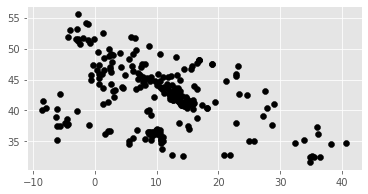

In [16]:
rgdf.plot(color = 'black')

In [ ]:
# this is simple enough that all steps are in one cell
c = []
for cgrp in j['romanamphitheaterschronogroups']:
    c.append((cgrp['id'],
    cgrp['startdate'],
    cgrp['enddate']))
    
chrono_df  = pd.DataFrame(c, columns=('chronogroup','startdate','enddate'))

chrono_df.to_csv("chronogrps.csv", index = False, quoting = csv.QUOTE_NONNUMERIC)
chrono_df.head(2)

In [ ]:
ramphs_df.merge(chrono_df)